In [30]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np

In [31]:
model = AbstractModel()
model.i = Set()
model.j = Set(initialize=model.i)
model.R = Param(model.i)

def lowband(model,i):
    return (model.R[i],100)
model.x = Var(model.i, bounds=lowband, within=NonNegativeReals, initialize=0)
model.y = Var(model.i, bounds=lowband, within=NonNegativeReals, initialize=0)
model.W = Var( bounds=(0,100), within=NonNegativeReals, initialize=0)
model.L = Var( bounds=(0,100), within=NonNegativeReals, initialize=0)

def rule_eq1(model,i,j):
    if i>j:
        return (model.x[i]-model.x[j])**2+(model.y[i]-model.y[j])**2 >=(model.R[i]+model.R[j])**2
    else:
        return Constraint.Skip;
model.eq1 = Constraint(model.i,model.j,rule=rule_eq1)

def rule_eq2(model,i):
    return model.x[i] <=model.W-model.R[i]
model.eq2 = Constraint(model.i,rule=rule_eq2)

def rule_eq3(model,i):
    return model.y[i] <=model.L-model.R[i]
model.eq3 = Constraint(model.i,rule=rule_eq3)

def Obj_rule(model):
    return  model.W*model.L    
model.obj = Objective(rule=Obj_rule, sense=minimize)
opt = SolverFactory('ipopt')


In [36]:
instance = model.create_instance("EX13.dat")
results = opt.solve(instance) # solves and updates instance

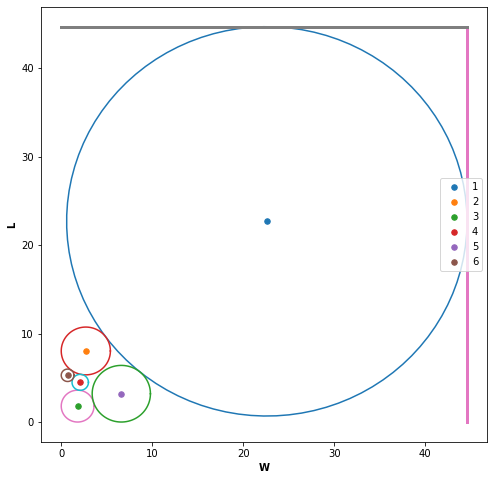

In [37]:
#f, ax = plt.subplots(1, 1)
fig = plt.figure(figsize=(8,8))
theta=np.linspace(0,2*np.pi,100)
for i in instance.i:
    plt.scatter( value(instance.x[i]),value(instance.y[i]),label=str(i),s=30)
    Xc=value(instance.x[i])+value(instance.R[i])*np.cos(theta)
    Yc=value(instance.y[i])+value(instance.R[i])*np.sin(theta)
    plt.plot(Xc,Yc)
    plt.plot(value(instance.W)*np.ones(2),[0,value(instance.L)],lw=3)
    plt.plot([0,value(instance.W)],value(instance.L)*np.ones(2),lw=3)

plt.legend(loc='right')
#plt.axis('off')
plt.xlabel('W',fontweight='bold')
plt.ylabel('L',fontweight='bold')
plt.show()

In [26]:
print('d1=' , round(value(instance.L),2))

d1= 44.68
